# Summary
- the rand networks' layers look the same...

In [71]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [72]:
# loading in them all made my machine run out of memory
method_l = [
    "maxcorr", 
#     "mincorr", 
#     "maxlinreg", 
#     "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [73]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results13_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["cca"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["cca"]["corrs"][network].values()))) # god this is a hack

In [74]:
network_l

['gpt2_medium-ptb_pos_dev.hdf5_0',
 'gpt2_medium-ptb_pos_dev.hdf5_1',
 'gpt2_medium-ptb_pos_dev.hdf5_2',
 'gpt2_medium-ptb_pos_dev.hdf5_3',
 'gpt2_medium-ptb_pos_dev.hdf5_4',
 'gpt2_medium-ptb_pos_dev.hdf5_5',
 'gpt2_medium-ptb_pos_dev.hdf5_6',
 'gpt2_medium-ptb_pos_dev.hdf5_7',
 'gpt2_medium-ptb_pos_dev.hdf5_8',
 'gpt2_medium-ptb_pos_dev.hdf5_9',
 'gpt2_medium-ptb_pos_dev.hdf5_10',
 'gpt2_medium-ptb_pos_dev.hdf5_11',
 'gpt2_medium-ptb_pos_dev.hdf5_12',
 'gpt2_medium-ptb_pos_dev.hdf5_13',
 'gpt2_medium-ptb_pos_dev.hdf5_14',
 'gpt2_medium-ptb_pos_dev.hdf5_15',
 'gpt2_medium-ptb_pos_dev.hdf5_16',
 'gpt2_medium-ptb_pos_dev.hdf5_17',
 'gpt2_medium-ptb_pos_dev.hdf5_18',
 'gpt2_medium-ptb_pos_dev.hdf5_19',
 'gpt2_medium-ptb_pos_dev.hdf5_20',
 'gpt2_medium-ptb_pos_dev.hdf5_21',
 'gpt2_medium-ptb_pos_dev.hdf5_22',
 'gpt2_medium-ptb_pos_dev.hdf5_23',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_0',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_1',
 'gpt2_medium-ptb_pos_dev_rand.hdf5_2',
 'gpt2_medium-ptb_pos_dev_

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [75]:
# rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}
rk_methods = {"maxcorr"} #, "mincorr", "maxlinreg", "minlinreg"}

In [76]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [77]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [78]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

gpt2_medium-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_1
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_2
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_3
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_4
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_5
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_6
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_7
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_8
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_9
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_10
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_11
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_12
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_13
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_dev.hdf5_14
         maxcorr
maxcorr      1.0
gpt2_medium-ptb_pos_

### Distributions

In [79]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



gpt2_medium-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
gpt2_small-ptb_pos_dev.hdf5_0                 316
gpt2_small-ptb_pos_dev.hdf5_1                  96
xlnet_large_cased-ptb_pos_dev.hdf5_0           70
gpt2_medium-ptb_pos_dev.hdf5_1                 59
gpt2_medium-ptb_pos_dev.hdf5_2                 51
                                             ... 
gpt2_medium-ptb_pos_dev.hdf5_20                 1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7        1
gpt2_medium-ptb_pos_dev.hdf5_19                 1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_14      1
Length: 69, dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          174
gpt2_medium-ptb_pos_dev_rand.hdf5_22           83
xlnet_large_cased-ptb_pos_dev.hdf5_23          72
gpt2_small-ptb_pos_dev_rand.hdf5_11            61
gpt2_medium-ptb_pos_dev_rand.hdf5_20           58
gpt2_medium-ptb_pos_dev_rand.hdf5_21           53
gpt2_medium-ptb_pos_dev_rand.hdf5_14           47
gpt2_mediu

          max       min       med
max  1.000000  0.295741  0.495948
min  0.295741  1.000000  0.388914
med  0.495948  0.388914  1.000000


gpt2_medium-ptb_pos_dev.hdf5_7:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_6          887
gpt2_medium-ptb_pos_dev.hdf5_8          135
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
gpt2_small-ptb_pos_dev.hdf5_4             1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          117
gpt2_medium-ptb_pos_dev_rand.hdf5_22           77
gpt2_small-ptb_pos_dev_rand.hdf5_11            66
gpt2_medium-ptb_pos_dev_rand.hdf5_21           53
gpt2_medium-ptb_pos_dev_rand.hdf5_20           50
gpt2_medium-ptb_pos_dev_rand.hdf5_19           50
gpt2_medium-ptb_pos_dev_rand.hdf5_13           43
gpt2_medium-ptb_pos_dev_rand.hdf5_14           42
gpt2_medium-ptb_pos_dev_rand.hdf5_16           41
gpt2_medium-ptb_pos_dev_rand.hdf5_18           41
gpt2_medium-ptb_pos_dev_rand.hdf5_17           37
gpt2_medium-ptb_pos_dev_rand.hdf5_15           37
xlnet_larg

gpt2_medium-ptb_pos_dev.hdf5_16    602
gpt2_medium-ptb_pos_dev.hdf5_14    420
gpt2_small-ptb_pos_dev.hdf5_4        1
gpt2_medium-ptb_pos_dev.hdf5_13      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          92
gpt2_small-ptb_pos_dev_rand.hdf5_11           75
gpt2_medium-ptb_pos_dev_rand.hdf5_22          71
gpt2_medium-ptb_pos_dev_rand.hdf5_21          47
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    45
                                              ..
gpt2_medium-ptb_pos_dev_rand.hdf5_3            1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_7      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_12     1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_9      1
Length: 65, dtype: int64

corr_df_pctl
          max      min       med
max  1.000000  0.35624  0.542592
min  0.356240  1.00000  0.419260
med  0.542592  0.41926  1.000000


gpt2_medium-ptb_pos_dev.hdf5_16:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev.hdf5_17    803
gpt2_medium-ptb_

          max       min       med
max  1.000000  0.241796  0.419210
min  0.241796  1.000000  0.725057
med  0.419210  0.725057  1.000000


gpt2_medium-ptb_pos_dev_rand.hdf5_1:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_2    1019
gpt2_medium-ptb_pos_dev_rand.hdf5_3       4
gpt2_small-ptb_pos_dev.hdf5_0             1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         482
xlnet_base_cased-ptb_pos_dev.hdf5_0            94
xlnet_large_cased-ptb_pos_dev.hdf5_0           39
xlnet_large_cased-ptb_pos_dev.hdf5_2           36
xlnet_base_cased-ptb_pos_dev.hdf5_1            24
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       23
xlnet_large_cased-ptb_pos_dev.hdf5_1           21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       21
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       17
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       16
xlnet_large_cased-ptb_pos_dev.hdf5_21          15
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       15

          max       min       med
max  1.000000  0.332002  0.467272
min  0.332002  1.000000  0.616453
med  0.467272  0.616453  1.000000


gpt2_medium-ptb_pos_dev_rand.hdf5_8:

maxcorr

maxcounts
gpt2_medium-ptb_pos_dev_rand.hdf5_9    741
gpt2_medium-ptb_pos_dev_rand.hdf5_7    283
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         243
xlnet_base_cased-ptb_pos_dev.hdf5_0           109
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       57
xlnet_large_cased-ptb_pos_dev.hdf5_2           54
xlnet_large_cased-ptb_pos_dev.hdf5_1           53
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       45
xlnet_large_cased-ptb_pos_dev.hdf5_0           41
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      40
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       40
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       37
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       33
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       25
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_10    

gpt2_medium-ptb_pos_dev_rand.hdf5_17    631
gpt2_medium-ptb_pos_dev_rand.hdf5_15    393
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         165
xlnet_base_cased-ptb_pos_dev.hdf5_0           115
xlnet_large_cased-ptb_pos_dev.hdf5_1           84
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       76
xlnet_large_cased-ptb_pos_dev.hdf5_2           71
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       48
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       38
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      38
xlnet_large_cased-ptb_pos_dev.hdf5_0           37
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       36
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       31
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      24
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       23
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      23
xlnet_base_cased-ptb_pos_dev.hdf5_1            23
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_9       17
xlnet_base_cased-ptb_pos_dev_rand.hdf5

          max       min       med
max  1.000000  0.557334  0.731364
min  0.557334  1.000000  0.571675
med  0.731364  0.571675  1.000000


gpt2_small-ptb_pos_dev.hdf5_1:

maxcorr

maxcounts
gpt2_small-ptb_pos_dev.hdf5_2           763
gpt2_small-ptb_pos_dev.hdf5_4             2
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
gpt2_small-ptb_pos_dev.hdf5_0             1
gpt2_medium-ptb_pos_dev.hdf5_3            1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          76
xlnet_large_cased-ptb_pos_dev.hdf5_23         76
gpt2_small-ptb_pos_dev_rand.hdf5_11           47
gpt2_medium-ptb_pos_dev_rand.hdf5_21          40
gpt2_medium-ptb_pos_dev_rand.hdf5_22          38
                                              ..
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       1
gpt2_medium-ptb_pos_dev_rand.hdf5_0            1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4      1
xlnet_base_cased-ptb_pos_dev.hdf5_9            1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_11     1
Length: 61, dtype: int64

co

          max       min       med
max  1.000000  0.309830  0.572912
min  0.309830  1.000000  0.424159
med  0.572912  0.424159  1.000000


gpt2_small-ptb_pos_dev.hdf5_11:

maxcorr

maxcounts
gpt2_small-ptb_pos_dev.hdf5_10     765
gpt2_small-ptb_pos_dev.hdf5_4        1
gpt2_small-ptb_pos_dev.hdf5_0        1
gpt2_medium-ptb_pos_dev.hdf5_23      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          68
gpt2_medium-ptb_pos_dev_rand.hdf5_22          41
gpt2_small-ptb_pos_dev_rand.hdf5_11           40
gpt2_medium-ptb_pos_dev_rand.hdf5_21          35
gpt2_medium-ptb_pos_dev_rand.hdf5_16          30
                                              ..
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       1
xlnet_large_cased-ptb_pos_dev.hdf5_2           1
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_13     1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_8      1
Length: 73, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.3

gpt2_small-ptb_pos_dev_rand.hdf5_9    505
gpt2_small-ptb_pos_dev_rand.hdf5_7    263
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         248
xlnet_base_cased-ptb_pos_dev.hdf5_0            87
xlnet_large_cased-ptb_pos_dev.hdf5_1           40
xlnet_large_cased-ptb_pos_dev.hdf5_2           38
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       35
xlnet_large_cased-ptb_pos_dev.hdf5_0           34
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       27
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       24
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       23
xlnet_large_cased-ptb_pos_dev.hdf5_3           19
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       17
xlnet_base_cased-ptb_pos_dev.hdf5_1            15
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      15
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3       13
xlnet_large_cased-ptb_pos_dev.hdf5_22          13
xlnet_base_cased-ptb_pos_dev_rand.hdf5_7       11
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       10
xlnet_base_cased-ptb_pos_dev_rand.hdf5_8  

          max       min       med
max  1.000000  0.242583  0.364429
min  0.242583  1.000000  0.704186
med  0.364429  0.704186  1.000000


gpt2_small-ptb_pos_dev_rand.hdf5_11:

maxcorr

maxcounts
gpt2_small-ptb_pos_dev_rand.hdf5_10    768
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23         227
xlnet_base_cased-ptb_pos_dev.hdf5_0            84
xlnet_large_cased-ptb_pos_dev.hdf5_1           53
xlnet_large_cased-ptb_pos_dev.hdf5_2           42
xlnet_base_cased-ptb_pos_dev_rand.hdf5_0       38
xlnet_base_cased-ptb_pos_dev.hdf5_1            31
xlnet_base_cased-ptb_pos_dev_rand.hdf5_2       27
xlnet_large_cased-ptb_pos_dev.hdf5_0           25
xlnet_base_cased-ptb_pos_dev_rand.hdf5_1       24
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      22
xlnet_base_cased-ptb_pos_dev_rand.hdf5_4       20
xlnet_large_cased-ptb_pos_dev.hdf5_22          17
xlnet_base_cased-ptb_pos_dev_rand.hdf5_6       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5       16
xlnet_base_cased-ptb_pos_dev_rand.hdf5

          max       min       med
max  1.000000 -0.023745  0.450497
min -0.023745  1.000000  0.276554
med  0.450497  0.276554  1.000000


xlnet_base_cased-ptb_pos_dev.hdf5_6:

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev.hdf5_7     611
xlnet_base_cased-ptb_pos_dev.hdf5_5     156
xlnet_large_cased-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          56
gpt2_small-ptb_pos_dev_rand.hdf5_11           43
gpt2_small-ptb_pos_dev_rand.hdf5_0            38
gpt2_medium-ptb_pos_dev_rand.hdf5_19          31
gpt2_medium-ptb_pos_dev_rand.hdf5_21          30
                                              ..
xlnet_large_cased-ptb_pos_dev_rand.hdf5_15     1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_3      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_8      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_18     1
gpt2_small-ptb_pos_dev_rand.hdf5_2             1
Length: 73, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.053540  0.382843
min

          max       min       med
max  1.000000  0.463571  0.525541
min  0.463571  1.000000  0.636817
med  0.525541  0.636817  1.000000


xlnet_base_cased-ptb_pos_dev_rand.hdf5_4:

maxcorr

maxcounts
xlnet_base_cased-ptb_pos_dev_rand.hdf5_3    390
xlnet_base_cased-ptb_pos_dev_rand.hdf5_5    378
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     165
gpt2_medium-ptb_pos_dev_rand.hdf5_22      97
gpt2_medium-ptb_pos_dev_rand.hdf5_20      93
gpt2_medium-ptb_pos_dev_rand.hdf5_21      67
gpt2_medium-ptb_pos_dev_rand.hdf5_19      42
gpt2_medium-ptb_pos_dev_rand.hdf5_16      42
gpt2_medium-ptb_pos_dev_rand.hdf5_18      37
gpt2_medium-ptb_pos_dev_rand.hdf5_17      36
gpt2_small-ptb_pos_dev_rand.hdf5_11       27
gpt2_medium-ptb_pos_dev_rand.hdf5_14      26
gpt2_medium-ptb_pos_dev_rand.hdf5_15      23
gpt2_medium-ptb_pos_dev_rand.hdf5_13      19
gpt2_medium-ptb_pos_dev_rand.hdf5_12      16
gpt2_medium-ptb_pos_dev_rand.hdf5_11      12
gpt2_medium-ptb_pos_dev_rand.hdf5_9       10
gpt2_

xlnet_large_cased-ptb_pos_dev.hdf5_0    770
xlnet_large_cased-ptb_pos_dev.hdf5_2    253
xlnet_base_cased-ptb_pos_dev.hdf5_1       1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          176
gpt2_medium-ptb_pos_dev_rand.hdf5_22           94
gpt2_small-ptb_pos_dev_rand.hdf5_11            80
gpt2_medium-ptb_pos_dev_rand.hdf5_21           64
gpt2_medium-ptb_pos_dev_rand.hdf5_17           63
gpt2_medium-ptb_pos_dev_rand.hdf5_14           56
gpt2_medium-ptb_pos_dev_rand.hdf5_16           54
gpt2_medium-ptb_pos_dev_rand.hdf5_20           51
gpt2_medium-ptb_pos_dev_rand.hdf5_18           43
gpt2_medium-ptb_pos_dev_rand.hdf5_19           43
gpt2_small-ptb_pos_dev_rand.hdf5_10            36
gpt2_small-ptb_pos_dev_rand.hdf5_9             34
gpt2_small-ptb_pos_dev_rand.hdf5_8             30
gpt2_medium-ptb_pos_dev_rand.hdf5_15           28
gpt2_medium-ptb_pos_dev_rand.hdf5_13           27
gpt2_medium-ptb_pos_dev_rand.hdf5_10           20
gpt2_medium-ptb_pos_dev_rand.hdf5_11        

gpt2_medium-ptb_pos_dev_rand.hdf5_23          87
gpt2_small-ptb_pos_dev_rand.hdf5_11           65
xlnet_large_cased-ptb_pos_dev_rand.hdf5_23    63
gpt2_medium-ptb_pos_dev_rand.hdf5_22          54
gpt2_medium-ptb_pos_dev_rand.hdf5_21          38
                                              ..
xlnet_large_cased-ptb_pos_dev_rand.hdf5_11     2
xlnet_large_cased-ptb_pos_dev_rand.hdf5_0      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_1      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_2      1
xlnet_large_cased-ptb_pos_dev_rand.hdf5_4      1
Length: 71, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.033627  0.366322
min  0.033627  1.000000  0.410205
med  0.366322  0.410205  1.000000


xlnet_large_cased-ptb_pos_dev.hdf5_10:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_9     787
xlnet_large_cased-ptb_pos_dev.hdf5_11    237
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          78
gpt2_small-ptb_pos_dev_rand.hdf5_11           67
xlnet_large_c

          max       min       med
max  1.000000  0.157675  0.399691
min  0.157675  1.000000  0.349434
med  0.399691  0.349434  1.000000


xlnet_large_cased-ptb_pos_dev.hdf5_21:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev.hdf5_20    594
xlnet_large_cased-ptb_pos_dev.hdf5_22    429
xlnet_large_cased-ptb_pos_dev.hdf5_0       1
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23          75
gpt2_small-ptb_pos_dev_rand.hdf5_11           75
gpt2_medium-ptb_pos_dev_rand.hdf5_22          52
gpt2_small-ptb_pos_dev_rand.hdf5_8            48
gpt2_medium-ptb_pos_dev_rand.hdf5_19          43
gpt2_medium-ptb_pos_dev_rand.hdf5_17          41
gpt2_medium-ptb_pos_dev_rand.hdf5_15          38
gpt2_small-ptb_pos_dev_rand.hdf5_9            38
gpt2_medium-ptb_pos_dev_rand.hdf5_13          36
gpt2_medium-ptb_pos_dev_rand.hdf5_20          35
gpt2_medium-ptb_pos_dev_rand.hdf5_18          34
gpt2_medium-ptb_pos_dev_rand.hdf5_14          32
gpt2_medium-ptb_pos_dev_rand.hdf5_12          31
gpt2_me

gpt2_medium-ptb_pos_dev_rand.hdf5_23     220
gpt2_medium-ptb_pos_dev_rand.hdf5_22     129
gpt2_medium-ptb_pos_dev_rand.hdf5_21     103
gpt2_medium-ptb_pos_dev_rand.hdf5_20      89
gpt2_medium-ptb_pos_dev_rand.hdf5_18      59
gpt2_medium-ptb_pos_dev_rand.hdf5_19      55
gpt2_medium-ptb_pos_dev_rand.hdf5_17      52
gpt2_medium-ptb_pos_dev_rand.hdf5_16      48
gpt2_medium-ptb_pos_dev_rand.hdf5_14      32
gpt2_small-ptb_pos_dev_rand.hdf5_11       29
gpt2_medium-ptb_pos_dev_rand.hdf5_15      27
gpt2_medium-ptb_pos_dev_rand.hdf5_11      26
gpt2_small-ptb_pos_dev_rand.hdf5_10       24
gpt2_medium-ptb_pos_dev_rand.hdf5_12      24
gpt2_medium-ptb_pos_dev_rand.hdf5_13      22
gpt2_medium-ptb_pos_dev_rand.hdf5_10      18
gpt2_small-ptb_pos_dev_rand.hdf5_8        12
gpt2_medium-ptb_pos_dev_rand.hdf5_9       11
gpt2_medium-ptb_pos_dev_rand.hdf5_8       10
gpt2_small-ptb_pos_dev_rand.hdf5_7         9
gpt2_medium-ptb_pos_dev_rand.hdf5_6        7
gpt2_small-ptb_pos_dev_rand.hdf5_9         4
gpt2_small

          max       min       med
max  1.000000  0.364991  0.457009
min  0.364991  1.000000  0.515828
med  0.457009  0.515828  1.000000


xlnet_large_cased-ptb_pos_dev_rand.hdf5_11:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_rand.hdf5_10    520
xlnet_large_cased-ptb_pos_dev_rand.hdf5_12    504
dtype: int64

mincounts
gpt2_medium-ptb_pos_dev_rand.hdf5_23     168
gpt2_medium-ptb_pos_dev_rand.hdf5_20      93
gpt2_medium-ptb_pos_dev_rand.hdf5_22      82
gpt2_medium-ptb_pos_dev_rand.hdf5_21      71
gpt2_medium-ptb_pos_dev_rand.hdf5_17      63
gpt2_medium-ptb_pos_dev_rand.hdf5_19      61
gpt2_medium-ptb_pos_dev_rand.hdf5_18      60
gpt2_small-ptb_pos_dev_rand.hdf5_11       39
gpt2_medium-ptb_pos_dev_rand.hdf5_13      37
gpt2_medium-ptb_pos_dev_rand.hdf5_15      36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      33
gpt2_medium-ptb_pos_dev_rand.hdf5_12      32
gpt2_medium-ptb_pos_dev_rand.hdf5_14      32
gpt2_medium-ptb_pos_dev_rand.hdf5_11      21
gpt2_medium-ptb_pos_dev_rand.hdf5_8       20

xlnet_large_cased-ptb_pos_dev_rand.hdf5_18    536
xlnet_large_cased-ptb_pos_dev_rand.hdf5_20    488
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev.hdf5_23    146
gpt2_medium-ptb_pos_dev_rand.hdf5_23      84
gpt2_medium-ptb_pos_dev_rand.hdf5_21      66
gpt2_medium-ptb_pos_dev_rand.hdf5_22      63
gpt2_medium-ptb_pos_dev_rand.hdf5_20      47
gpt2_medium-ptb_pos_dev_rand.hdf5_18      39
gpt2_medium-ptb_pos_dev_rand.hdf5_17      38
gpt2_medium-ptb_pos_dev_rand.hdf5_19      37
gpt2_small-ptb_pos_dev_rand.hdf5_11       36
gpt2_medium-ptb_pos_dev_rand.hdf5_14      36
gpt2_medium-ptb_pos_dev_rand.hdf5_16      32
gpt2_medium-ptb_pos_dev_rand.hdf5_13      29
gpt2_medium-ptb_pos_dev_rand.hdf5_12      27
gpt2_small-ptb_pos_dev_rand.hdf5_9        26
gpt2_medium-ptb_pos_dev_rand.hdf5_9       26
gpt2_medium-ptb_pos_dev_rand.hdf5_15      24
gpt2_medium-ptb_pos_dev_rand.hdf5_8       23
gpt2_small-ptb_pos_dev_rand.hdf5_8        22
gpt2_small-ptb_pos_dev_rand.hdf5_10       21
gpt2_medium-ptb_pos_d

# LinCKA

In [80]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(network_l, axis=1)
#lincka_df = lincka_df.reindex(lincka_df.columns)

In [81]:
lincka_df.head(50)

,gpt2_medium-ptb_pos_dev.hdf5_0,gpt2_medium-ptb_pos_dev.hdf5_1,gpt2_medium-ptb_pos_dev.hdf5_2,gpt2_medium-ptb_pos_dev.hdf5_3,gpt2_medium-ptb_pos_dev.hdf5_4,gpt2_medium-ptb_pos_dev.hdf5_5,gpt2_medium-ptb_pos_dev.hdf5_6,gpt2_medium-ptb_pos_dev.hdf5_7,gpt2_medium-ptb_pos_dev.hdf5_8,gpt2_medium-ptb_pos_dev.hdf5_9,...,xlnet_large_cased-ptb_pos_dev_rand.hdf5_14,xlnet_large_cased-ptb_pos_dev_rand.hdf5_15,xlnet_large_cased-ptb_pos_dev_rand.hdf5_16,xlnet_large_cased-ptb_pos_dev_rand.hdf5_17,xlnet_large_cased-ptb_pos_dev_rand.hdf5_18,xlnet_large_cased-ptb_pos_dev_rand.hdf5_19,xlnet_large_cased-ptb_pos_dev_rand.hdf5_20,xlnet_large_cased-ptb_pos_dev_rand.hdf5_21,xlnet_large_cased-ptb_pos_dev_rand.hdf5_22,xlnet_large_cased-ptb_pos_dev_rand.hdf5_23
gpt2_medium-ptb_pos_dev.hdf5_0,NaN,0.877789,0.863055,0.770760,0.742164,0.741877,0.741735,0.741654,0.741931,0.742139,...,0.253363,0.246475,0.240749,0.232187,0.225423,0.217122,0.205587,0.192760,0.181125,0.168313
gpt2_medium-ptb_pos_dev.hdf5_1,0.877789,NaN,0.979173,0.928932,0.909882,0.909519,0.909203,0.909364,0.909486,0.909776,...,0.104210,0.101508,0.099782,0.096579,0.093592,0.089761,0.085470,0.080672,0.076107,0.071317
gpt2_medium-ptb_pos_dev.hdf5_2,0.863055,0.979173,NaN,0.953467,0.933107,0.932713,0.932341,0.932386,0.932554,0.932792,...,0.106810,0.104020,0.102196,0.098982,0.096081,0.092200,0.087904,0.082915,0.078271,0.073360
gpt2_medium-ptb_pos_dev.hdf5_3,0.770760,0.928932,0.953467,NaN,0.996564,0.996475,0.996356,0.996310,0.996363,0.996378,...,0.034981,0.034144,0.033611,0.033050,0.032133,0.029904,0.028689,0.027182,0.025468,0.023989
gpt2_medium-ptb_pos_dev.hdf5_4,0.742164,0.909882,0.933107,0.996564,NaN,0.999892,0.999776,0.999732,0.999723,0.999715,...,0.018491,0.018034,0.017736,0.017702,0.017242,0.015485,0.014882,0.014156,0.013082,0.012375
gpt2_medium-ptb_pos_dev.hdf5_5,0.741877,0.909519,0.932713,0.996475,0.999892,NaN,0.999887,0.999829,0.999795,0.999757,...,0.018643,0.018183,0.017888,0.017848,0.017389,0.015623,0.015016,0.014275,0.013203,0.012490
gpt2_medium-ptb_pos_dev.hdf5_6,0.741735,0.909203,0.932341,0.996356,0.999776,0.999887,NaN,0.999917,0.999860,0.999806,...,0.018773,0.018302,0.018005,0.017957,0.017496,0.015730,0.015116,0.014374,0.013296,0.012580
gpt2_medium-ptb_pos_dev.hdf5_7,0.741654,0.909364,0.932386,0.996310,0.999732,0.999829,0.999917,NaN,0.999931,0.999871,...,0.018805,0.018337,0.018038,0.017987,0.017531,0.015763,0.015150,0.014408,0.013331,0.012610
gpt2_medium-ptb_pos_dev.hdf5_8,0.741931,0.909486,0.932554,0.996363,0.999723,0.999795,0.999860,0.999931,NaN,0.999943,...,0.018904,0.018433,0.018134,0.018079,0.017623,0.015850,0.015231,0.014487,0.013411,0.012690
gpt2_medium-ptb_pos_dev.hdf5_9,0.742139,0.909776,0.932792,0.996378,0.999715,0.999757,0.999806,0.999871,0.999943,NaN,...,0.018926,0.018449,0.018147,0.018089,0.017628,0.015859,0.015237,0.014503,0.013422,0.012700


In [82]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

# RBFCKA

In [83]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [84]:
# rbfcka_df

In [85]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [86]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [87]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(network_l, axis=1)
# sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(network_l, axis=1)
# pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(network_l, axis=1)
# sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(network_l, axis=1)
# pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(network_l, axis=1)
# pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [88]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [89]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [90]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [91]:
# layer order

In [92]:
plt.rcParams["figure.figsize"] = (20,15)

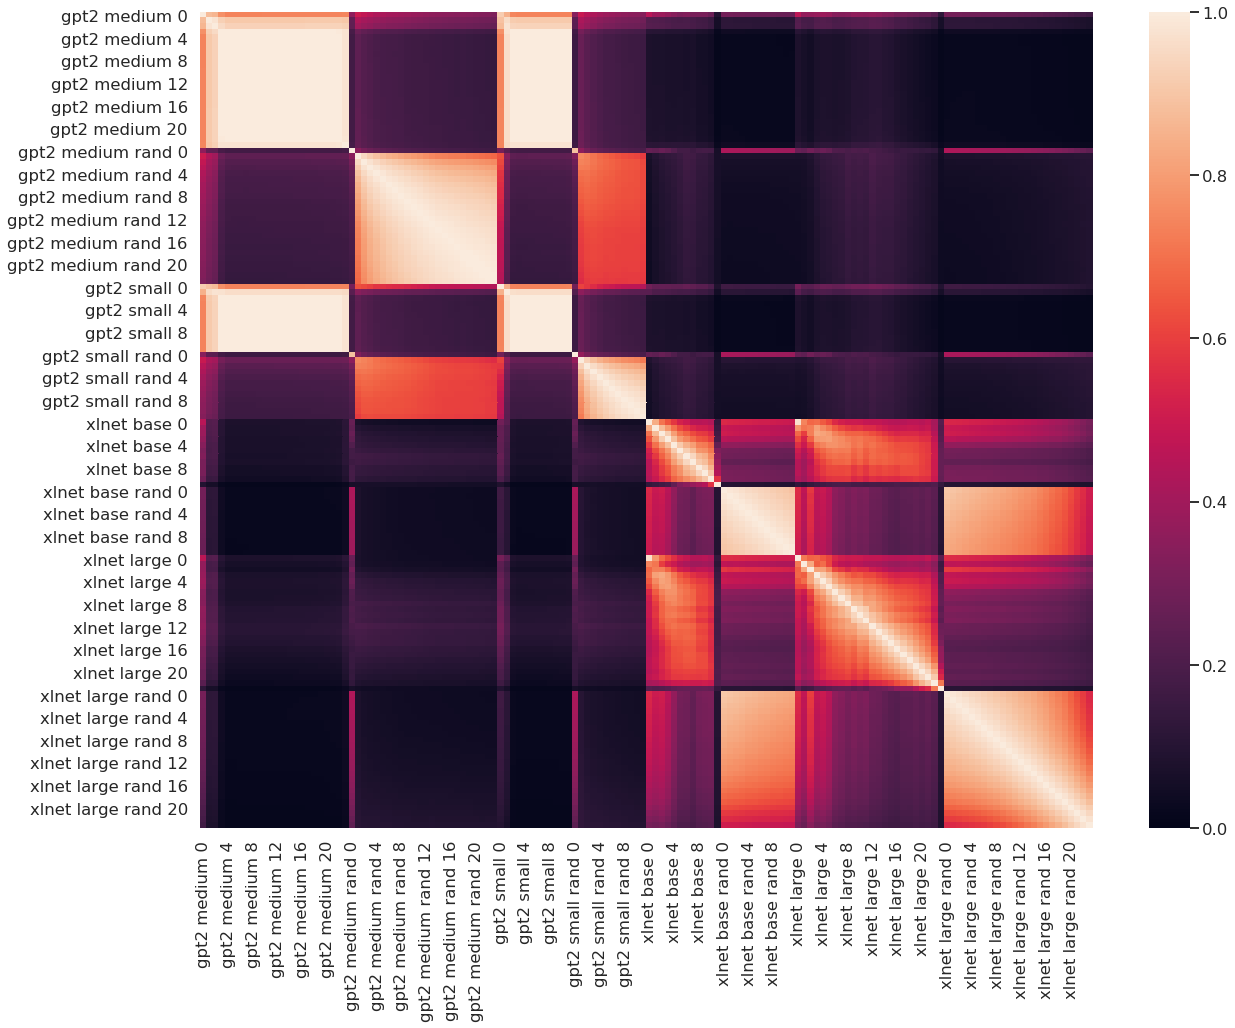

In [93]:
# lincka
long2short = {'gpt2_medium-ptb_pos_dev_rand.hdf5': 'gpt2 medium rand', 'gpt2_medium-ptb_pos_dev.hdf5': 'gpt2 medium', 
             'gpt2_small-ptb_pos_dev_rand.hdf5': 'gpt2 small rand', 'gpt2_small-ptb_pos_dev.hdf5': 'gpt2 small',
             'xlnet_base_cased-ptb_pos_dev_rand.hdf5': 'xlnet base rand', 'xlnet_base_cased-ptb_pos_dev.hdf5': 'xlnet base',
             'xlnet_large_cased-ptb_pos_dev_rand.hdf5': 'xlnet large rand', 'xlnet_large_cased-ptb_pos_dev.hdf5': 'xlnet large'}
short_labels = [long2short[label.rsplit('_', 1)[0]] + ' ' + label.split('_')[-1] for label in network_l]
short_labels = [short_labels[i] if i % 4 == 0 else '' for i in range(len(short_labels))]
g = sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
#g = sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)
g.get_figure().savefig('random-lincka-heatmap.pdf')

In [107]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.pdf".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        g = sns.heatmap(df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
        # sns.heatmap(df.fillna(1), )
        g.get_figure().savefig(fname)
        #plt.savefig(fname, transparent=True)
        plt.show()

In [95]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw13_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [96]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv13_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [108]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l)
maxmin_corrs_df = maxmin_corrs_df.reindex(network_l, axis=1)
# maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr13_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [98]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(network_l)
linreg_corrs_df = linreg_corrs_df.reindex(network_l, axis=1)
# linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

KeyError: 'maxlinreg'

In [ ]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [ ]:
# comparing models
# use lincka
model1 = "xlnet"
model2 = "xlnet"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [ ]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()